# Ein CNN zur Verkehrszeichenerkennung trainieren

In [ ]:
import tsclassifier

# 1. Bestimme, ob wir auf der GPU oder CPU arbeiten
import torch
device = torch.device("cuda" if torch.cuda.is_available else "cpu")

# 2. Erzeuge ein CNN und schiebe es auf das Device
model = tsclassifier.CNN4TSRecognition().to(device)

# 3. Bereite Trainings- und Testdaten vor
train_loader, test_loader = tsclassifier.get_data_loaders()

# 4. Trainiere das CNN
accs = tsclassifier.train_model(model, device, 20, train_loader, test_loader)

# Ein CNN wiederherstellen und auf frischen Daten anwenden

In [2]:
%whos

Interactive namespace is empty.


In [3]:
import pickle
datei = open(f"models/model_019.pkl", "rb")
model = pickle.load(datei)
datei.close()

/home/juebrauer/miniconda3/envs/env_ws23/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Ich lade das Modul tsclassifier ein!


In [4]:
model

CNN4TSRecognition(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu1): ReLU()
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu2): ReLU()
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu3): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=50176, out_features=512, bias=True)
  (relu4): ReLU()
  (fc2): Linear(in_features=512, out_features=43, bias=True)
)

In [5]:
import torchsummary

In [9]:
torchsummary.summary(model, input_size=(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 224, 224]             448
              ReLU-2         [-1, 16, 224, 224]               0
         MaxPool2d-3         [-1, 16, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]           4,640
              ReLU-5         [-1, 32, 112, 112]               0
         MaxPool2d-6           [-1, 32, 56, 56]               0
            Conv2d-7           [-1, 64, 56, 56]          18,496
              ReLU-8           [-1, 64, 56, 56]               0
         MaxPool2d-9           [-1, 64, 28, 28]               0
          Flatten-10                [-1, 50176]               0
           Linear-11                  [-1, 512]      25,690,624
             ReLU-12                  [-1, 512]               0
           Linear-13                   [-1, 43]          22,059
Total params: 25,736,267
Trainable para

Predicted class: 22


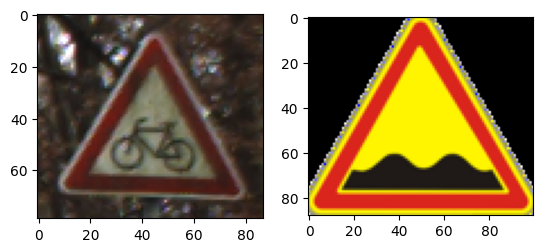

Predicted class: 32


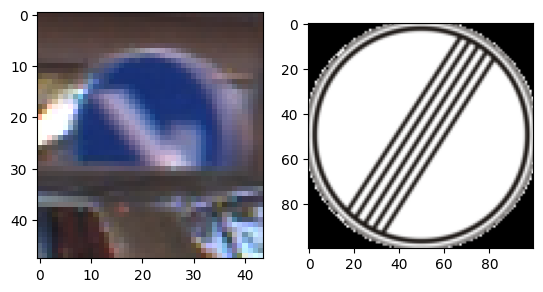

Predicted class: 26


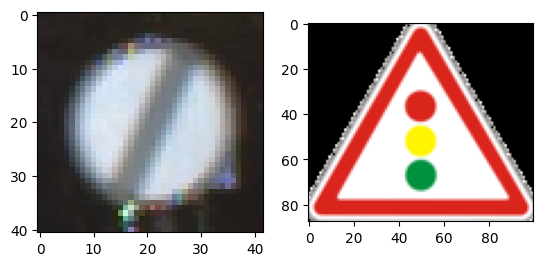

Predicted class: 38


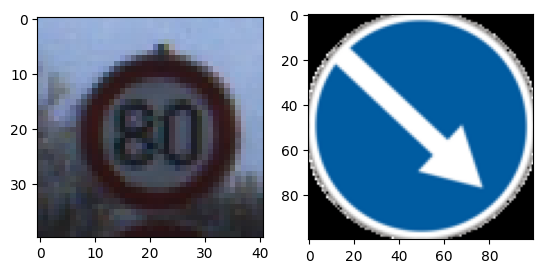

Predicted class: 18


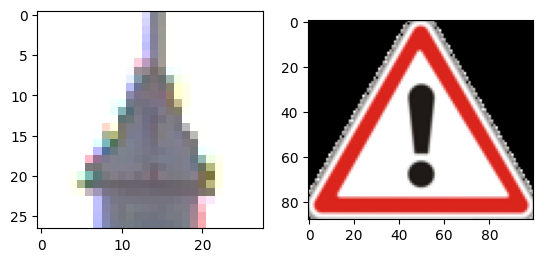

Predicted class: 2


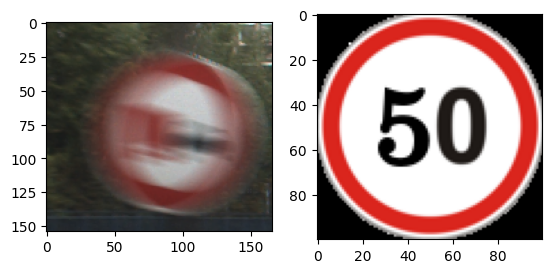

Predicted class: 27


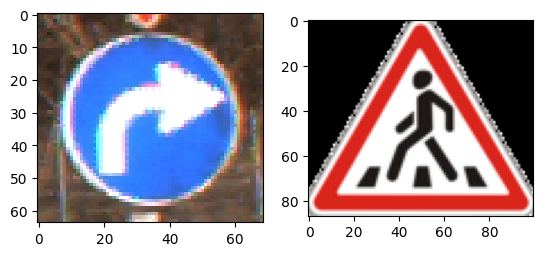

Predicted class: 18


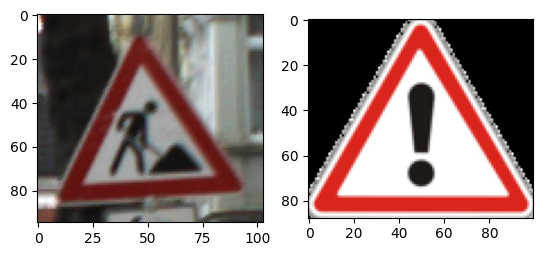

Predicted class: 34


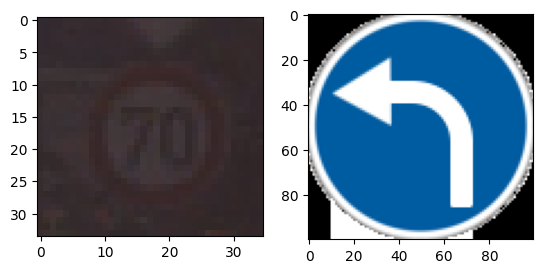

Predicted class: 21


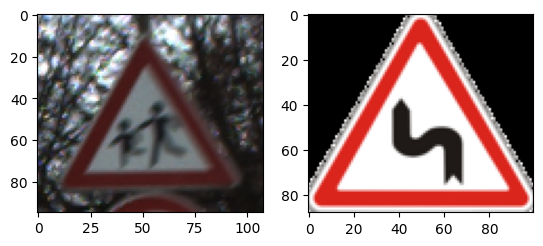

In [45]:
import cv2
import torch
from torchvision import transforms
from PIL import Image
import os

def test_on_fresh_images(testfolder, nr_test_imgs):

    # 1. Liste aller Testbilder bestimmen
    all_test_image_files = os.listdir(testfolder)

     # Transformationen, die während des Trainings verwendet wurden
    img_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor()
    ])

    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available else "cpu")

    for test_img_nr in range(nr_test_imgs):

        # Nächstes Testbild einlesen
        img = cv2.imread(testfolder + "/" + all_test_image_files[test_img_nr])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Konvertieren Sie das OpenCV-Bild in ein PIL-Bild
        pil_image = Image.fromarray(img)

        # Wenden Sie die Transformationen an
        transformed_image = img_transform(pil_image)
            
        # Fügen Sie eine zusätzliche Dimension hinzu, um ein Batch mit einem Bild zu erstellen
        batch = transformed_image.unsqueeze(0)
        
        # Führen Sie eine Vorhersage durch        
        with torch.no_grad():
            batch = batch.to(device)
            output = model(batch)
        
        # Konvertieren Sie die Ausgabe in eine wahrscheinliche Kategorie (optional)
        _, predicted = torch.max(output.data, 1)
        
        # Drucken Sie das Ergebnis
        predicted_class = predicted.item()
        print("Predicted class:", predicted_class )
        
        meta_fname = f"/home/juebrauer/link_to_vcd/07_datasets/36_gtsrb/gtsrb/meta/{predicted_class}.png"
        tsicon = cv2.imread(meta_fname)
        tsicon = cv2.cvtColor(tsicon, cv2.COLOR_BGR2RGB)
        
        import matplotlib.pyplot as plt
        plt.subplot(1,2,1)
        plt.imshow(img)
        plt.subplot(1,2,2)
        plt.imshow(tsicon)
        plt.show()

test_on_fresh_images("/home/juebrauer/link_to_vcd/07_datasets/36_gtsrb/gtsrb/test", 10)

In [42]:
import tsclassifier
import importlib
importlib.reload(tsclassifier)
train_loader, test_loader = tsclassifier.get_data_loaders()
tsclassifier.test_model(model, test_loader, device)

Ich lade das Modul tsclassifier ein!
torch.Size([32, 3, 224, 224])
tensor([[[0.8196, 0.7569, 0.6941,  ..., 0.2941, 0.2941, 0.2941],
         [0.8157, 0.7569, 0.6980,  ..., 0.2706, 0.2706, 0.2706],
         [0.8078, 0.7569, 0.7020,  ..., 0.2431, 0.2431, 0.2431],
         ...,
         [0.8039, 0.8000, 0.7961,  ..., 0.1804, 0.1804, 0.1804],
         [0.8118, 0.8078, 0.8078,  ..., 0.1882, 0.1882, 0.1843],
         [0.8235, 0.8196, 0.8157,  ..., 0.1922, 0.1922, 0.1882]],

        [[0.4275, 0.3843, 0.3373,  ..., 0.2706, 0.2706, 0.2706],
         [0.4196, 0.3804, 0.3412,  ..., 0.2471, 0.2471, 0.2471],
         [0.4157, 0.3804, 0.3412,  ..., 0.2235, 0.2235, 0.2235],
         ...,
         [0.5804, 0.5725, 0.5647,  ..., 0.1608, 0.1569, 0.1529],
         [0.5647, 0.5608, 0.5529,  ..., 0.1647, 0.1608, 0.1529],
         [0.5490, 0.5451, 0.5412,  ..., 0.1686, 0.1647, 0.1569]],

        [[0.2863, 0.2471, 0.2078,  ..., 0.2784, 0.2784, 0.2745],
         [0.2784, 0.2431, 0.2078,  ..., 0.2549, 0.2549, 

ZeroDivisionError: division by zero